In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the Libraries.
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#import keras.backend as K
import tensorflow.keras.backend as K
import tensorflow.compat.v1 as tf
from os import listdir
from os.path import isfile, join
import numpy as np
import sys
import os
import shutil
import pandas as pd
from PIL import Image
import cv2
import keras
import glob
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.models import load_model
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from PIL import ImageFile

In [ ]:
tf.enable_eager_execution()

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Data Augmentation.
DataGenerator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, brightness_range=[0.2,0.7], rescale=1./255, zoom_range = [0.5,1.0])

In [ ]:
TestGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
Grey_TrainingData = DataGenerator.flow_from_directory('/content/drive/My Drive/DTD dataset/dtd/Train/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 5075 images belonging to 47 classes.


In [ ]:
Grey_ValidData = TestGenerator.flow_from_directory('/content/drive/My Drive/DTD dataset/dtd/Valid/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 282 images belonging to 47 classes.


In [ ]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
conv_base = InceptionResNetV2(weights = 'imagenet', include_top = False, pooling = 'avg')

219062272/219055592 [==============================] - 5s 0us/step


In [ ]:
for layer in conv_base.layers[:765]:
  layer.trainable = False
for layer in conv_base.layers[765:]:
  layer.trainable = True
for layer in conv_base.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

In [ ]:
for i, layer in enumerate(conv_base.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization True
3 activation False
4 conv2d_1 False
5 batch_normalization_1 True
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 True
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 True
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 True
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 True
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 True
24 batch_normalization_9 True
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 True
33 batch_normalization_7 True
34 batch_normalization_10 True
35 batch_normalization_11 True
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed_5b False
41 conv2d_15 False
42 batch_normalization_15 True
43 activat

In [ ]:
from keras.layers import Input

In [ ]:
input_tensor = Input(shape=(224,224,1))

In [ ]:
x = Conv2D(3,(3,3), padding='same')(input_tensor)

In [ ]:
x = conv_base(x)

In [ ]:
x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
out = Dense(47, activation='softmax')(x)

In [ ]:
model = Model(inputs = input_tensor, outputs = out)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 224, 224, 3)       30        
_________________________________________________________________
inception_resnet_v2 (Functio (None, 1536)              54336736  
_________________________________________________________________
dense (Dense)                (None, 2048)              3147776   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 47)                96303     
Total params: 57,580,845
Trainable params: 8,103,597
Non-trainable params: 49,477,248
__________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTD_SGDGreyscale.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 20,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model.fit_generator(steps_per_epoch=634,generator= Grey_TrainingData, validation_data= Grey_ValidData, validation_steps=35,epochs=100,callbacks=callBacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
634/634 [==============================] - ETA: 0s - loss: 5.5852 - accuracy: 0.0381
Epoch 00001: val_loss improved from inf to 8.57262, saving model to /content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTD_SGDGreyscale.h5
634/634 [==============================] - 2043s 3s/step - loss: 5.5852 - accuracy: 0.0381 - val_loss: 8.5726 - val_accuracy: 0.0857
Epoch 2/100
634/634 [==============================] - ETA: 0s - loss: 5.4170 - accuracy: 0.0989
Epoch 00002: val_loss improved from 8.57262 to 6.40762, saving model to /content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTD_SGDGreyscale.h5
634/634 [==============================] - 73s 115ms/step - loss: 5.4170 - accuracy: 0.0989 - val_loss: 6.4076 - val_accuracy: 0.1536
Epoch 3/100
634/634 [==============================] - ETA: 0s - loss: 5.2614 - accuracy: 0.1535
Epoch 00003: val_loss did not improve from 6.40762
634/634 [========

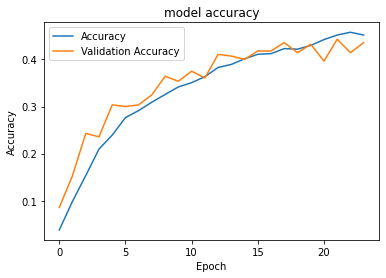

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

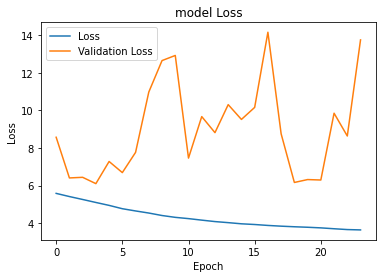

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
GreyTestData = TestGenerator.flow_from_directory('/content/drive/My Drive/DTD dataset/dtd/Test/', target_size=(224,224), batch_size = 8, shuffle = False, color_mode='grayscale')

Found 283 images belonging to 47 classes.


In [ ]:
model.load_weights('/content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTD_Greyscale.h5')

In [ ]:
Grey_predict = model.predict(GreyTestData)

In [ ]:
Grey_predict_classes = np.argmax(Grey_predict, axis=1)

In [ ]:
Grey_predict_classes

array([ 0, 17, 22,  0, 42, 39, 42, 37, 42, 39, 37, 42, 39, 35, 41, 22,  6,
       22, 35, 43, 36,  3, 42,  9, 44, 35, 14,  6, 30, 30,  0, 16,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6, 42, 37, 42, 42, 37, 42,  6, 16,  0,
       42, 41, 29, 23, 42,  6,  9, 35, 42, 30, 30, 10, 42, 30, 16, 42,  6,
       11, 35, 11, 11,  9, 42, 42, 29,  0, 42, 13, 34, 11,  8, 13, 37, 26,
       11, 29, 35, 15, 26,  0, 42,  0, 39, 41, 39,  0,  5, 22, 16,  0, 44,
        0, 12, 46, 22, 22,  0, 18,  6,  5, 16, 18, 16, 19, 26, 19, 42, 29,
       41, 42, 21,  0, 11,  6, 35, 26, 11, 42, 11, 26, 39,  0,  0,  0,  0,
       39,  0, 23, 42, 22, 35, 42,  6, 11, 42, 42, 11,  1, 42, 16, 16, 16,
       42, 16,  6, 26, 10, 26, 42, 26, 26, 25, 32,  0, 10, 16, 30, 15, 42,
       11, 42, 29, 42, 29, 22, 16, 29,  0, 39, 30, 27, 33, 30, 30, 10, 42,
       42, 42, 41, 35, 42, 32, 40, 42, 42, 34, 37, 41, 42, 17,  8, 16,  6,
       42, 37, 42, 11, 42, 13, 35, 35,  6, 26,  6, 16, 42,  0,  0,  4, 40,
        6, 15, 41, 41, 37

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
Grey_accuracy = accuracy_score(GreyTestData.classes, Grey_predict_classes)
print("Grey Accuracy: ", Grey_accuracy)

Grey Accuracy:  0.20141342756183744


In [ ]:
Grey_precision = precision_score(GreyTestData.classes, Grey_predict_classes,average="weighted")
print("Grey Precision: ", Grey_precision)

Grey Precision:  0.23830057942578495


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Grey_recall = recall_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("Grey Recall:", Grey_recall)

Grey Recall: 0.20141342756183744


In [ ]:
Grey_f1_score = f1_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("F1 score for Grey: ", Grey_f1_score)

F1 score for Grey:  0.1772602919373425


In [ ]:
Colour_TrainingData =  DataGenerator.flow_from_directory('/content/drive/My Drive/DTD dataset/dtd/Train/', target_size=(224,224), batch_size=8)

Found 5075 images belonging to 47 classes.


In [ ]:
Colour_ValidData =  TestGenerator.flow_from_directory('/content/drive/My Drive/DTD dataset/dtd/Valid/', target_size=(224,224), batch_size=8)

Found 282 images belonging to 47 classes.


In [ ]:
conv_base_colour = InceptionResNetV2(weights = 'imagenet', include_top = False, pooling = 'avg')

In [ ]:
for layer in conv_base.layers[:765]:
  layer.trainable = False
for layer in conv_base.layers[765:]:
  layer.trainable = True
for layer in conv_base.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

In [ ]:
for i, layer in enumerate(conv_base.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization True
3 activation False
4 conv2d_1 False
5 batch_normalization_1 True
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 True
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 True
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 True
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 True
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 True
24 batch_normalization_9 True
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 True
33 batch_normalization_7 True
34 batch_normalization_10 True
35 batch_normalization_11 True
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed_5b False
41 conv2d_15 False
42 batch_normalization_15 True
43 activat

In [ ]:
from keras.layers import Input

In [ ]:
input_tensor = Input(shape=(224,224,3))

In [ ]:
x = conv_base_colour(input_tensor)

In [ ]:
x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
out = Dense(47, activation='softmax')(x)

In [ ]:
model_colour = Model(inputs = input_tensor, outputs = out)

In [ ]:
model_colour.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 1536)              54336736  
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              3147776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 47)                96303     
Total params: 57,580,815
Trainable params: 57,520,271
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
model_colour.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTDSGD_Colour.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 20,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model_colour.fit_generator(steps_per_epoch=634,generator= Colour_TrainingData, validation_data= Colour_ValidData, validation_steps=35,epochs=100,callbacks=callBacks)

Epoch 1/100
634/634 [==============================] - ETA: 0s - loss: 5.5780 - accuracy: 0.0485
Epoch 00001: val_loss improved from inf to 5.98233, saving model to /content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTDSGD_Colour.h5
634/634 [==============================] - 101s 159ms/step - loss: 5.5780 - accuracy: 0.0485 - val_loss: 5.9823 - val_accuracy: 0.1500
Epoch 2/100
634/634 [==============================] - ETA: 0s - loss: 5.3137 - accuracy: 0.1251
Epoch 00002: val_loss did not improve from 5.98233
634/634 [==============================] - 96s 151ms/step - loss: 5.3137 - accuracy: 0.1251 - val_loss: 6.8381 - val_accuracy: 0.2071
Epoch 3/100
634/634 [==============================] - ETA: 0s - loss: 4.9495 - accuracy: 0.2309
Epoch 00003: val_loss improved from 5.98233 to 5.77524, saving model to /content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTDSGD_Colour.h5
634/634 [==============================] - 99s 156ms/step - loss: 4.9495 - accuracy: 0.2309 - val

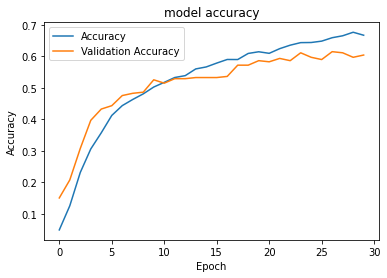

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

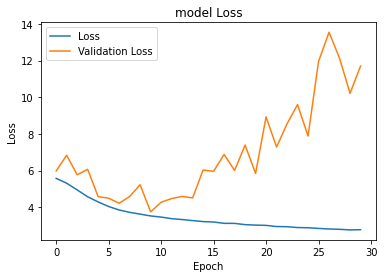

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
Colour_TestData = TestGenerator.flow_from_directory('/content/drive/My Drive/DTD dataset/dtd/Test/', target_size=(224,224), batch_size = 8, shuffle = False)

Found 283 images belonging to 47 classes.


In [ ]:
model_colour.load_weights('/content/drive/My Drive/DTD dataset/dtd/Inception_ResnetV2_DTD_Colour.h5')

In [ ]:
Colour_predict = model_colour.predict(Colour_TestData)

In [ ]:
Colour_predict_classes = np.argmax(Colour_predict, axis=1)

In [ ]:
Colour_predict_classes

array([ 0, 22,  0,  0, 39,  0,  1, 34, 31, 29, 28, 31,  2,  2,  2, 46,  2,
       33,  3,  3, 15,  3,  3, 36, 33, 43,  4, 27, 30, 40, 41, 17,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  7, 31,  7,  7, 31,  6,  8, 16, 17,
        8, 29,  8,  9, 34,  9,  9, 34,  9, 10, 30, 30, 30, 30,  3, 31, 11,
       11, 24, 11,  6, 12, 12, 12, 12,  8, 12, 13, 13, 36,  3, 13, 13, 14,
       14, 25, 35, 14, 14,  0, 15, 22, 41, 15, 41, 16, 16, 17, 25, 16, 16,
       17, 17, 17, 35, 22, 17, 18, 18, 18, 18, 18,  3, 19, 19, 19, 19, 18,
       41, 17, 20, 20, 20,  8, 20, 41, 21,  8, 15, 21, 21,  0, 41,  0, 22,
       22,  0,  7, 31, 17,  3, 23, 15, 32, 28, 24,  8, 17, 24, 25, 25, 16,
       27, 16, 25, 26, 40, 41, 26, 26, 26, 27, 18, 27, 27, 16, 27,  3, 12,
       31, 28, 33, 12, 29, 22, 17, 17, 22, 15, 27, 10, 25, 30, 30, 10, 31,
       12, 31, 31, 32, 31, 32, 32, 32, 32, 32, 32, 33, 20, 39, 25, 33, 25,
       43, 12, 42, 38, 34, 13, 35, 12,  2, 41,  6, 35, 28, 17,  8, 36, 36,
       36, 41,  9, 26, 37

In [ ]:
Colour_accuracy = accuracy_score(Colour_TestData.classes, Colour_predict_classes)
print("Colour Accuracy: ", Colour_accuracy)

Colour Accuracy:  0.5406360424028268


In [ ]:
Colour_precision = precision_score(Colour_TestData.classes, Colour_predict_classes,average="weighted")
print("Colour Precision: ", Colour_precision)

Colour Precision:  0.625050861976657


In [ ]:
Colour_recall = recall_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("Colour Recall:", Colour_recall)

Colour Recall: 0.5406360424028268


In [ ]:
Colour_f1_score = f1_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("F1 score for colour: ", Colour_f1_score)

F1 score for colour:  0.5350209134037861


In [ ]:
Final = 0.6* Colour_predict + 0.4* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_Predict_classes

array([ 0, 22,  0,  0, 39,  0,  1, 34, 31, 29, 28, 31,  2,  2,  2, 46,  2,
       33,  3,  3, 15,  3,  3, 36, 33, 43,  4, 27, 30, 40, 41, 17,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  7, 31,  7,  7, 31,  6,  8, 16, 17,
        8, 41,  8,  9, 34,  9,  9, 34,  9, 10, 30, 30, 30, 30,  3, 31, 11,
       11, 24, 11,  6, 12, 12, 12, 12,  0, 12, 13, 13, 36,  3, 13, 13, 14,
       14, 25, 35, 14, 14,  0, 15, 22, 41, 15, 41, 16,  5, 17, 25, 16, 16,
       17, 17, 17, 35, 22, 17, 18, 18, 18, 18, 18,  3, 19, 19, 19, 19, 18,
       41, 17, 20, 20, 20,  8, 20, 41, 21,  8, 15, 21, 21,  0, 41,  0, 22,
       22,  0,  7, 31, 17,  3, 23, 15, 32, 28, 24,  8, 17, 24, 25, 25, 16,
       27, 16, 25, 26, 40, 41, 26, 26, 26, 27, 18, 27, 27, 16, 27,  3, 12,
       31, 28, 33, 12, 29, 22, 17, 17, 22, 15, 27, 10, 25, 30, 30, 10, 31,
       12, 31, 31, 32, 31, 32, 32, 32, 32, 32, 32, 33, 20, 39, 25, 33, 25,
       43, 12, 42, 38, 34, 13, 35, 12,  2, 41,  6, 35, 28, 17,  8, 36, 36,
       36, 41,  9, 26, 37

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.5371024734982333


In [ ]:
Final_precision = precision_score(Colour_TestData.classes, Final_Predict_classes,average="weighted")
print("Colour Precision: ", Final_precision)

Colour Precision:  0.6234245142372351


In [ ]:
Final_recall = recall_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("Colour Recall:", Final_recall)

Colour Recall: 0.5371024734982333


In [ ]:
Final_f1_score = f1_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("F1 score for colour: ", Final_f1_score)

F1 score for colour:  0.532481477760389


In [ ]:
Second_Final = 0.5* Colour_predict + 0.5 * Grey_predict

In [ ]:
Second_predict_classes = np.argmax(Second_Final, axis=1)

In [ ]:
Second_predict_classes

array([ 0, 22,  0,  0, 39,  0,  1, 34, 31, 29, 28, 31,  2,  2,  2, 46,  2,
       33,  3,  3, 15,  3,  3, 36, 33, 43,  4, 27, 30, 40, 41, 17,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  7, 31,  7,  7, 31,  6,  8, 16, 17,
        8, 41,  8,  9, 34,  9,  9, 34,  9, 10, 30, 30, 30, 30,  3, 31, 11,
       11, 24, 11,  6, 12, 12, 12, 12,  0, 12, 13, 13, 36,  3, 13, 13, 14,
       14, 25, 35, 14, 14,  0, 15, 22, 41, 15, 41, 16,  5, 17, 25, 16, 16,
       17, 17, 17, 35, 22, 17, 18, 18, 18, 18, 18,  3, 19, 19, 19, 19, 18,
       41, 17, 20, 20, 20,  8, 20, 41, 21,  8, 15, 21, 21,  0, 41,  0, 22,
       22,  0,  7, 31, 17,  3, 23, 15, 32, 28, 24,  8, 17, 24, 25, 25, 16,
       27, 16, 25, 26, 40, 41, 26, 26, 26, 27, 18, 27, 10, 16, 27,  3, 12,
       31, 28, 33, 12, 29, 22, 17, 17, 22, 15, 27, 10, 25, 30, 30, 10, 31,
       12, 31, 31,  4, 31, 32, 32, 32, 32, 32, 32, 33, 20, 39, 25, 33, 25,
       43, 12, 42, 38, 34, 13, 35, 12,  2, 41,  6, 35, 28, 17,  8, 36, 36,
       36, 41,  9, 26, 37

In [ ]:
Second_Final_accuracy = accuracy_score(Colour_TestData.classes, Second_predict_classes)
Second_Final_accuracy

0.5335689045936396

In [ ]:
Final = 0.8* Colour_predict + 0.2* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.4416961130742049
